<a href="https://www.kaggle.com/code/afolabib/data-science-jobs-insights?scriptVersionId=102647665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
#import seaborn as a data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read in the data science job data into the python console
sal=pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')

In [4]:
#show the top 5 rows of the dataset
sal.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#data cleaning
#There is an unnamed column in the dataset,It is a redundant so we use the 
#drop function to delete the column and makes the delete permanent with the inplace aurgument. 
sal.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#If you look at the dataset again, the Unnamed column has been removed
sal.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
#Let us check the information about the our dataset
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


**Observation**: 
All the data points in the dataset are filled and have 607 rows.

In [8]:
#Data cleaning
#employment type, experience level and company size have short form
#we use the replace function to replace the short form test

sal['employment_type'].replace('FT','Full-time',inplace=True)
sal['employment_type'].replace('PT','Part-time',inplace=True)
sal['employment_type'].replace('FL','Freelance',inplace=True)
sal['employment_type'].replace('CT','Contract',inplace=True)
sal['experience_level'].replace('EX','Executive',inplace=True)
sal['experience_level'].replace('SE','Senior-level',inplace=True)
sal['experience_level'].replace('MI','Mid-level',inplace=True)
sal['experience_level'].replace('EN','Entry-level',inplace=True)
sal['company_size'].replace('L','Large',inplace=True)
sal['company_size'].replace('M','Medium',inplace=True)
sal['company_size'].replace('S','Small',inplace=True)

In [9]:
#check the dataset again and you can see the replacement has been done.
sal.head(5)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

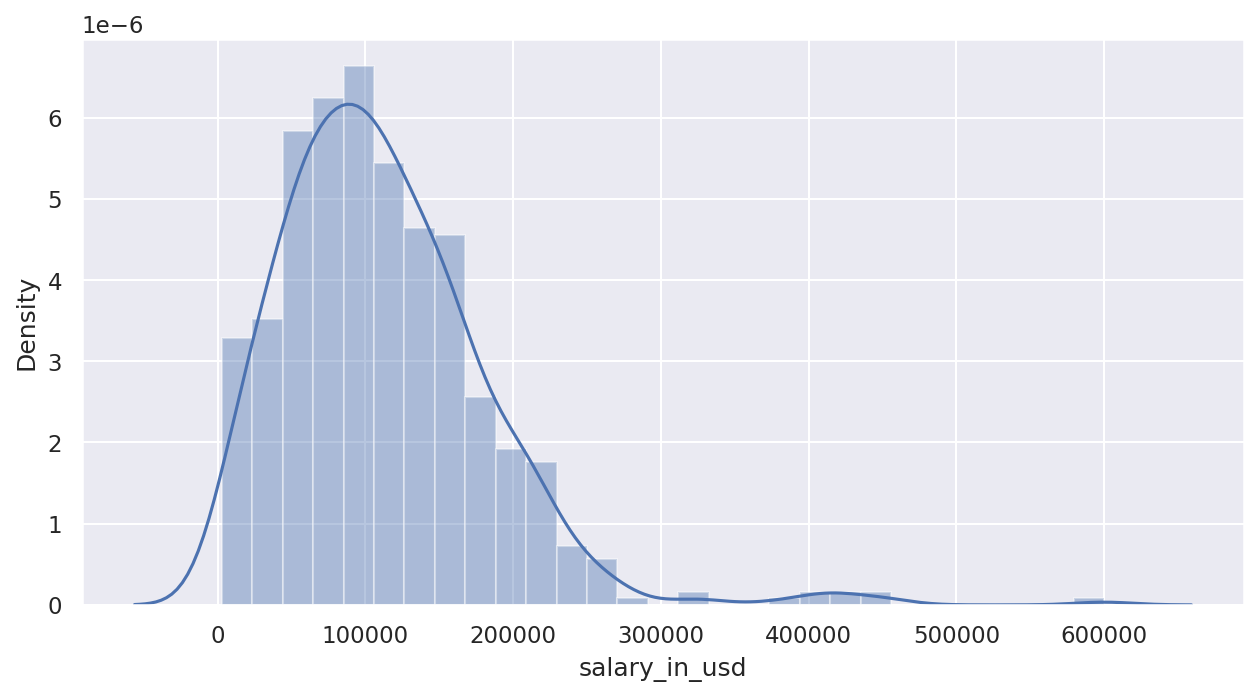

In [10]:
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sns.distplot(sal['salary_in_usd'],kde=True)

**Observation**

It is observed that the data is skewed to the right.

In [11]:
#Top 10 data science Job
sal['job_title'].value_counts(normalize=True).head(10)*100

Data Scientist                23.558484
Data Engineer                 21.746293
Data Analyst                  15.980231
Machine Learning Engineer      6.754530
Research Scientist             2.635914
Data Science Manager           1.976936
Data Architect                 1.812191
Big Data Engineer              1.317957
Machine Learning Scientist     1.317957
Principal Data Scientist       1.153213
Name: job_title, dtype: float64

**Data Analysis**

The table shows that over 6 out of 10 data science jobs are either data science; data engineering or data analysis. 

In [12]:
#The median salary of Top 10 Data Science Jobs
sal.pivot_table('salary_in_usd',
                'job_title',
                aggfunc='median').sort_values('salary_in_usd', ascending =False).head(10)

,salary_in_usd
job_title,
Data Analytics Lead,405000.0
Financial Data Analyst,275000.0
Head of Data,200000.0
Principal Data Engineer,200000.0
Data Architect,180000.0
Analytics Engineer,179850.0
Principal Data Scientist,173762.0
Director of Data Science,168000.0
Data Specialist,165000.0


**Data Analysis**

The table shows the top 10 data science job titles by their median salary. The median salary is preferable to the average mean for this data because the data is skewed to the right as shown above and also have some outliers. 


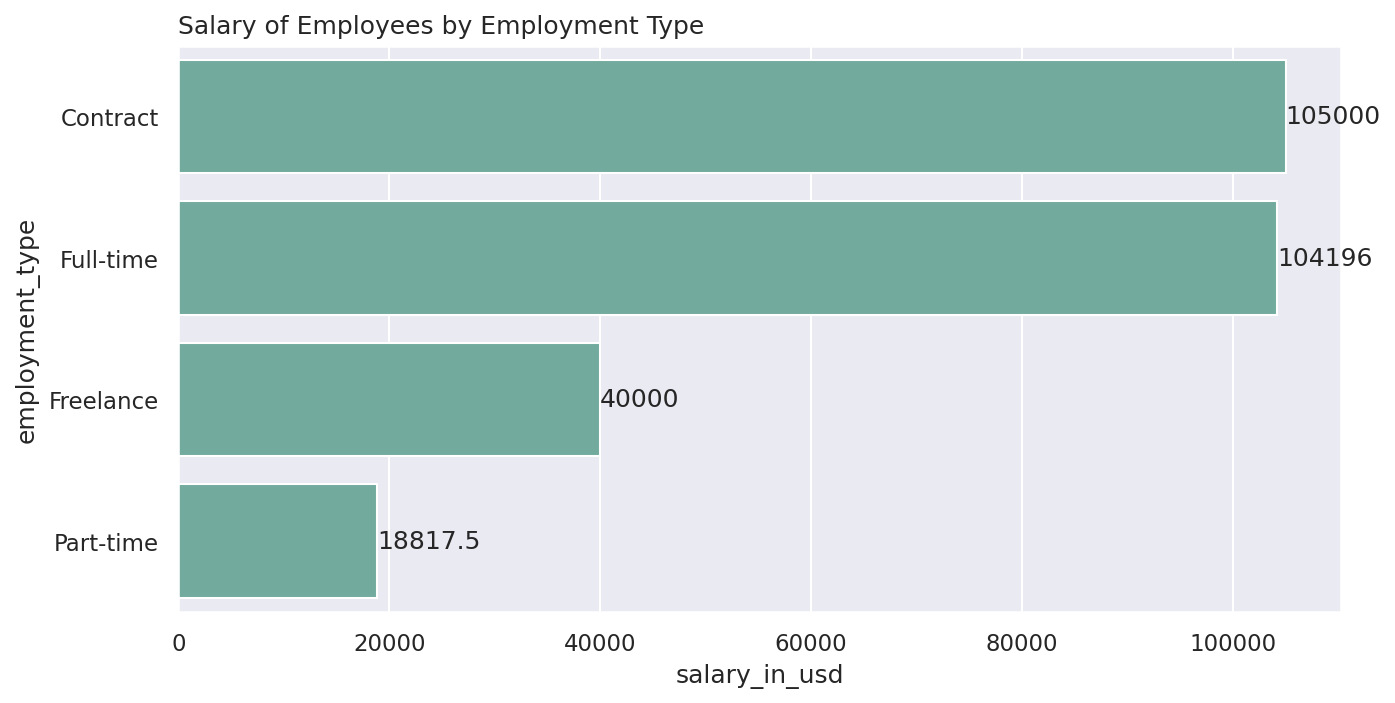

In [13]:
#Horizontal Barchart of median salary by employment type ordered from largest to lowest.
#Contract and full-time workers recieved better salary
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
ax=sns.barplot(x='salary_in_usd',
               y='employment_type',
               ci=None,
               color='#69b3a2',
               estimator = np.median,
               data=sal,order=['Contract','Full-time','Freelance','Part-time'])
plt.title('Salary of Employees by Employment Type',loc='left')
for i in ax.containers:
    ax.bar_label(i,)


**Data Analysis**

The chart shows the median salary of data science jobs by the type of employment.Contract and full-time jobs had a better salary scale compared to other type of data science job employment.

Text(0.0, 1.0, 'Salary of Employees by Employment Type')

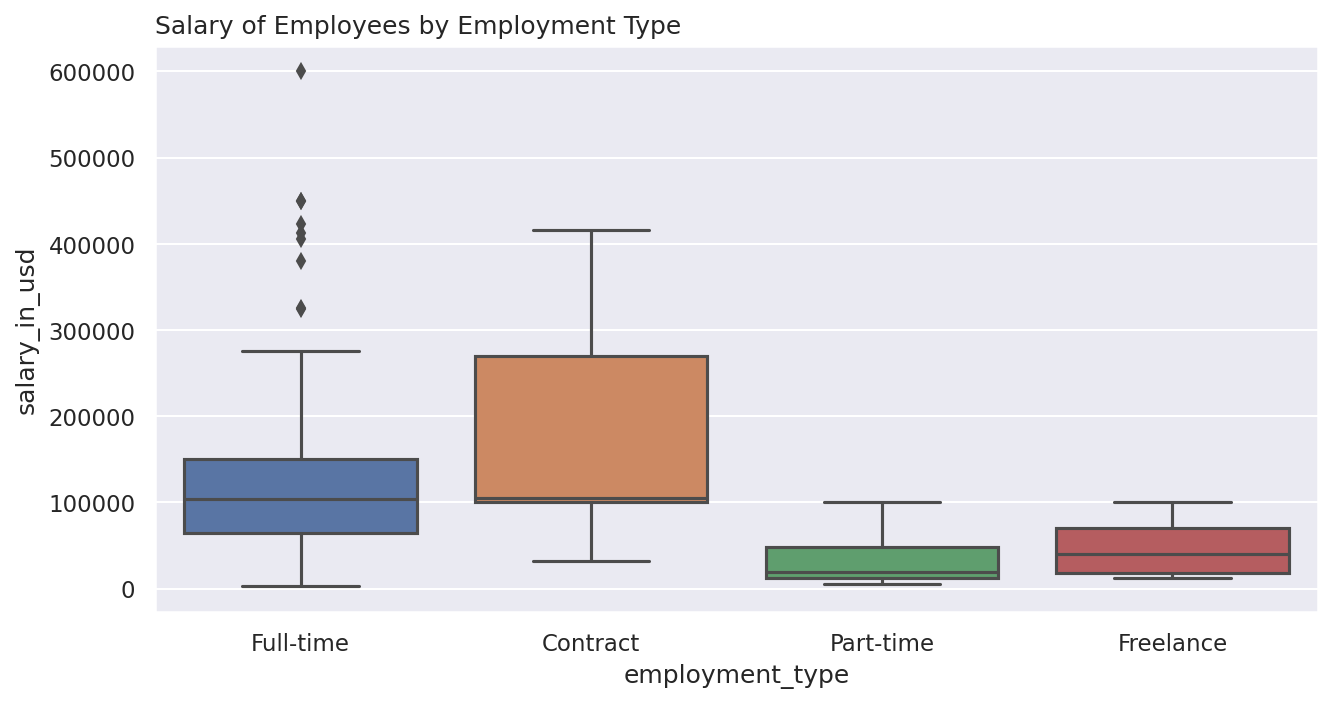

In [14]:
#Boxplot display of Salary of workers by employment type 
#There are some salaries outliers as seen in the boxplot for fulltime while a higher percentage of contract workers earned higher than part-time and freelance workers.   
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sns.boxplot(y='salary_in_usd',
            x='employment_type',
            data=sal)
plt.title('Salary of Employees by Employment Type',loc='left')

**Data Analysis**

The chart shows there are some salaries outliers as seen in the boxplot for fullt-ime, while a higher percentage of contract workers earned higher than part-time and freelance workers.   


In [15]:
#Total salary earned by employees by country
#United States tops countries with data science jobs earnings in USD.
sal.pivot_table('salary_in_usd', 
                'employee_residence',
                aggfunc='sum').sort_values('salary_in_usd', ascending=False).head(10)


,salary_in_usd
employee_residence,
US,49532447
GB,3581739
CA,2815474
DE,2138814
IN,1119670
FR,1077959
ES,863901
GR,732306
JP,724764


**Data Analysis**

United States tops countries with data science jobs earnings in USD. Of the USD68,164,807 total earnings in 3 years, United states had 73% of all data science jobs earnings.


In [16]:
#Top 10 countries data science employees live in. (%)
#More than half of the employees in data science resides in the United States 
sal['employee_residence'].value_counts(normalize=True).head(10)*100

US    54.695222
GB     7.248764
IN     4.942339
CA     4.777595
DE     4.118616
FR     2.965404
ES     2.471170
GR     2.141680
JP     1.153213
PT     0.988468
Name: employee_residence, dtype: float64

**Data Analysis**

The table shows the percentages of the top 10 countries data science employees live in. More than half of the employees in data science jobs resides in the United States.

In [17]:
#Median salary per Year
sal.pivot_table('salary_in_usd','work_year',aggfunc=np.median).sort_values('salary_in_usd', ascending=False)

,salary_in_usd
work_year,
2022,120000
2021,82528
2020,75544


**Data Analysis**

The median salary of data science jobs have grown by about 59% since 2020.

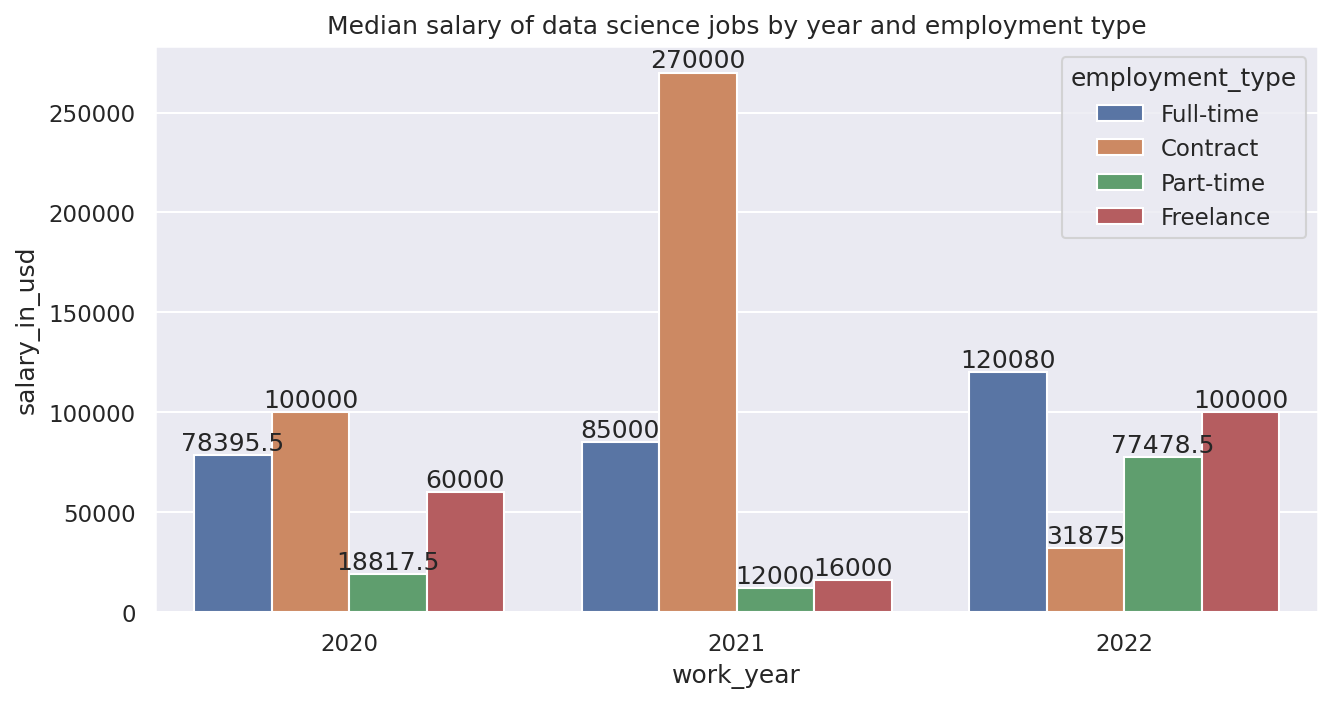

In [18]:
#median salary of data science of jobs by year and employment_type
#Median salary for data science job is highest in year 2022.
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
ax=sns.barplot(y='salary_in_usd',
               x='work_year',
               data=sal,
               ci=None,
               hue='employment_type',
               estimator=np.median
              )
plt.title('Median salary of data science jobs by year and employment type')
for i in ax.containers:
    ax.bar_label(i,)

**Data Analysis**


Median salary for data science job is highest in year 2022.

Text(0.5, 1.0, 'Median salary of data science jobs by year and employment type')

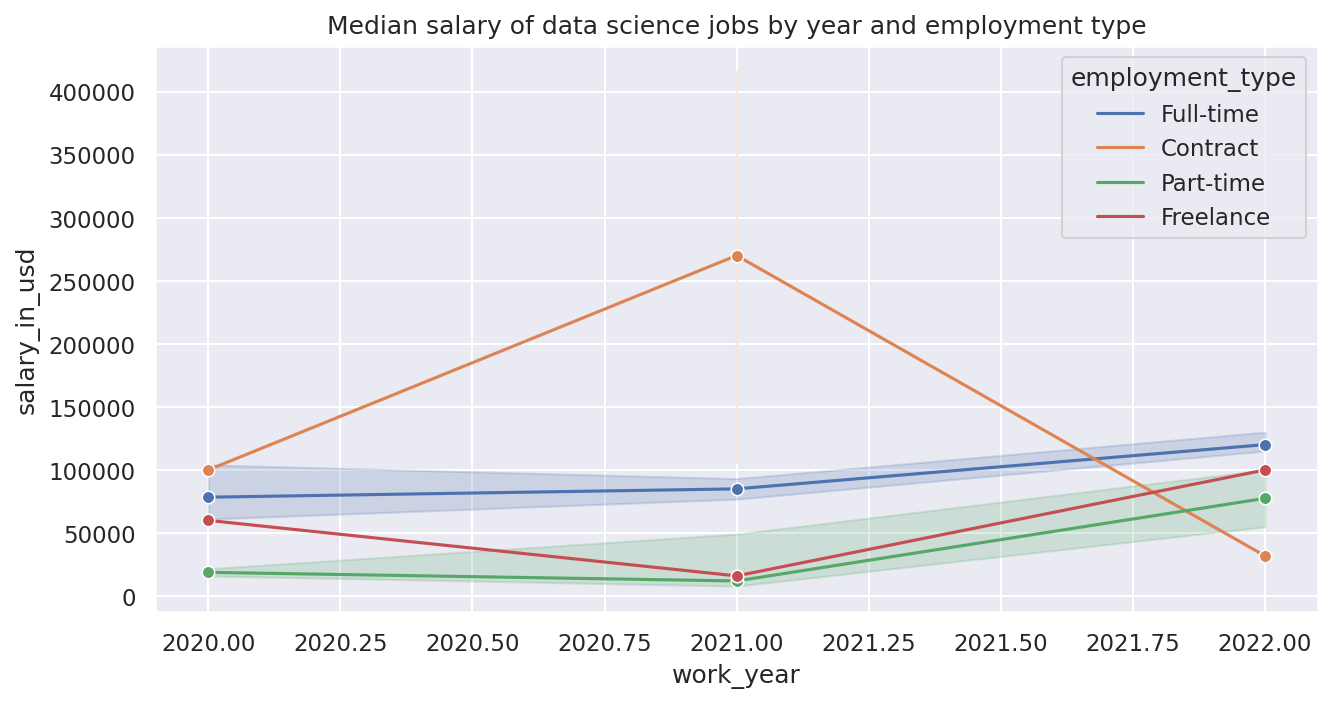

In [19]:
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sns.lineplot(x='work_year',
             y='salary_in_usd',
             data=sal,marker='o',
             hue='employment_type',
             estimator=np.median
            )
plt.title('Median salary of data science jobs by year and employment type')



**Data Analysis**

The chart shows that there was a rise in the median salary of data science full-time, part-time and freelance jobs in 2022. In contrast, data analysis contract job median salary declined by about 80%.

Text(0.5, 1.0, 'Median salary by experience level')

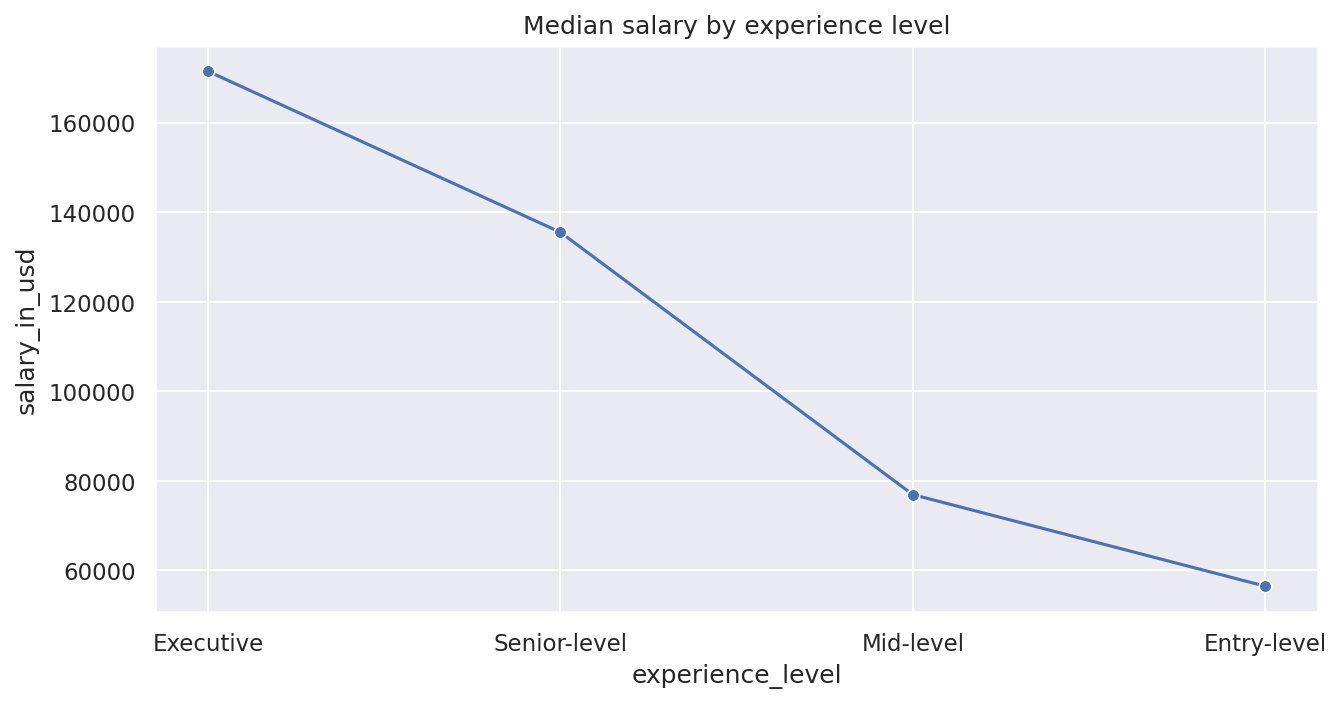

In [20]:
#Median salary by experience level
sal_ex=sal.pivot_table('salary_in_usd',
                    'experience_level',
                    aggfunc=np.median).sort_values('salary_in_usd', ascending=False)

plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sns.lineplot(data=sal_ex['salary_in_usd'],marker='o')
plt.title('Median salary by experience level')

**Data Analysis**

The chart shows that the more experienced you're as a data scientist, the more money you earn.


In [21]:
#percentage of currency salaries are paid.

sal['salary_currency'].value_counts(normalize=True)*100

USD    65.568369
EUR    15.650741
GBP     7.248764
INR     4.448105
CAD     2.965404
JPY     0.494234
PLN     0.494234
TRY     0.494234
CNY     0.329489
MXN     0.329489
HUF     0.329489
DKK     0.329489
SGD     0.329489
BRL     0.329489
AUD     0.329489
CLP     0.164745
CHF     0.164745
Name: salary_currency, dtype: float64

**Data Analysis**

80% of data science salary currencies are either paid in US Dollar or Euro.

In [22]:
#Data science Jobs and the Company locations

sal['company_location'].value_counts(normalize=True).head(10)*100

US    58.484349
GB     7.742998
CA     4.942339
DE     4.612850
IN     3.953871
FR     2.471170
ES     2.306425
GR     1.812191
JP     0.988468
NL     0.658979
Name: company_location, dtype: float64

**Data Analysis**


The table shows that 6 of 10 data science jobs are located in United States

Text(0.0, 1.0, 'Median salary of data science jobs by company size')

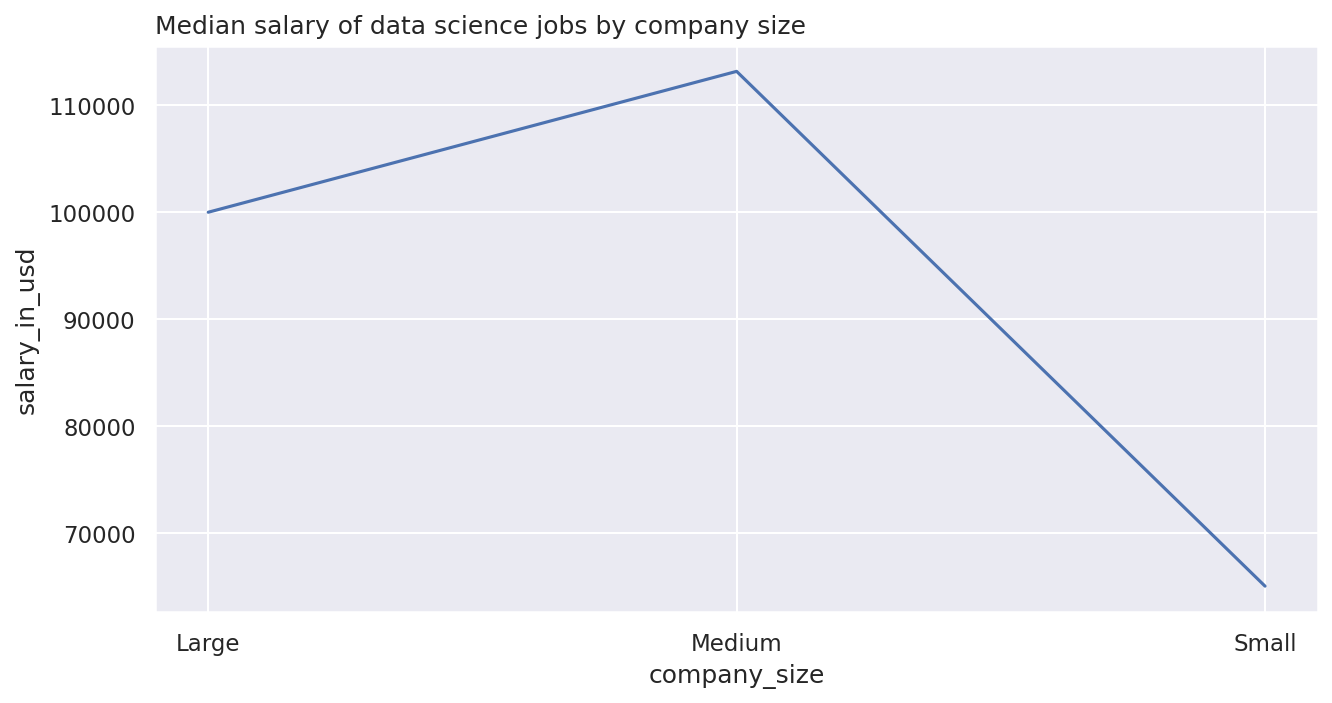

In [23]:
#Median salary of data science jobs by company size
sal_cs=sal.pivot_table('salary_in_usd','company_size',aggfunc=np.median)
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sns.lineplot(data=sal_cs['salary_in_usd'])
plt.title('Median salary of data science jobs by company size',loc='left')

**Data Analysis**

The chart shows that medium sized company pay more when compared to the other company size  

Text(0.0, 1.0, 'Test of Correlation between Salary and Remote Ratio')

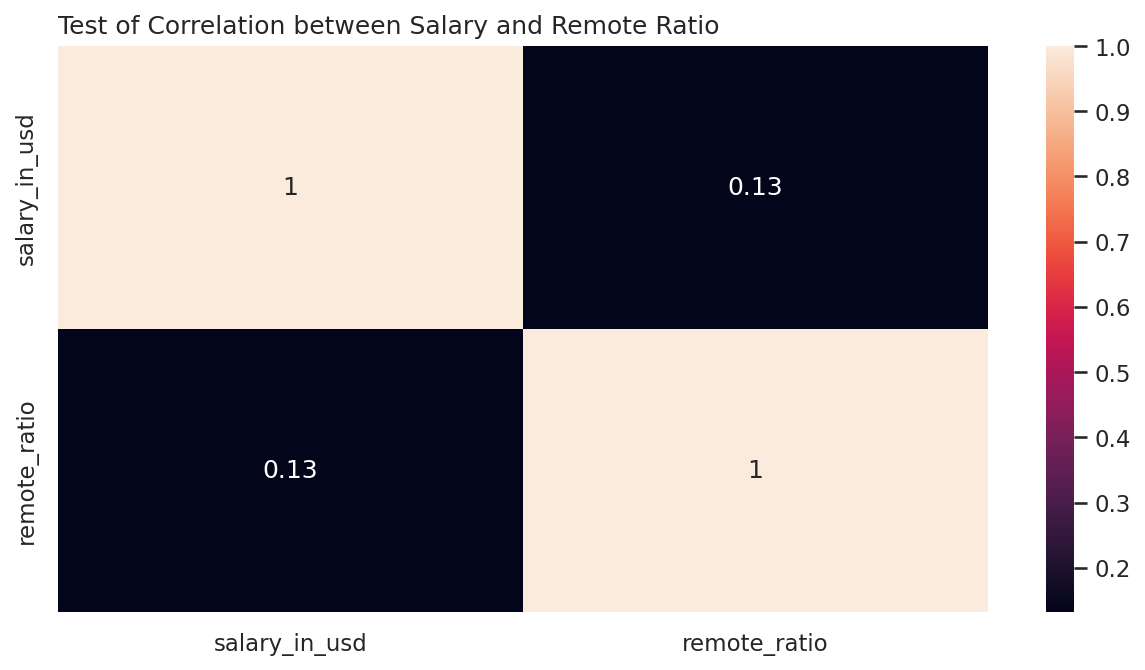

In [24]:
#test of correlation between salary and remote ratio 
plt.figure(figsize=(10,5),dpi=150)
sns.set(style='darkgrid')
sal_corr=sal[['salary_in_usd','remote_ratio']].corr()
sns.heatmap(sal_corr,annot=True)
plt.title('Test of Correlation between Salary and Remote Ratio',loc='left')

**Data Analysis**

The chart shows the correlation between remote ration and salary in USD is positive with 0.13.

In [25]:
#highest salary by jobtitle and year
sal[['job_title','salary_in_usd','work_year']].max()



job_title        Staff Data Scientist
salary_in_usd                  600000
work_year                        2022
dtype: object

**Data Analysis**

The highest paid is the staff data scientist in 2022. 

In [26]:
#lowest salary by jobtitle and year
sal[['job_title','salary_in_usd','work_year']].min()

job_title        3D Computer Vision Researcher
salary_in_usd                             2859
work_year                                 2020
dtype: object

**Data Analysis**

The lowest paid is the 3D computer vision researchers in 2020. 

In [27]:
#highest salary by jobtitle for year 2020
sal[sal['work_year']==2020][['job_title','salary_in_usd']].max()

job_title        Research Scientist
salary_in_usd                450000
dtype: object

**Data Analysis**

The highest paid is the research scientist in 2020. 

In [28]:
#highest salary by jobtitle for year 2021
sal[sal['work_year']==2021][['job_title','salary_in_usd']].max()

job_title        Staff Data Scientist
salary_in_usd                  600000
dtype: object

**Data Analysis**

The highest paid is the staff data scientist in 2021

In [29]:
#highest salary by jobtitle for year 2022
sal[sal['work_year']==2022][['job_title','salary_in_usd']].max()

job_title        Research Scientist
salary_in_usd                405000
dtype: object

**Data Analysis**

The highest paid is the research scientist in 2022

In [30]:
#The average salary for a Data Analyst
sal[sal['job_title']=='Data Analyst']['salary_in_usd'].mean()

92893.06185567011

**Data Analysis**

The average salaries in USD of a data analyst is USD92,893